In [1]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  NumExpr defaulting to 4 threads.
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y2': array([0., 2.]), 'g': array([-1.,  1.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.epileptor.Epileptor2D.tt = NArray(label='tt', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor2D.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'z': array([2., 5.])}, required=True)
WARNING 

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Final(field_type=<class 'dict'>, default={'xi': array([-4.,  4.]), 'eta': array([-3.,  3.]), 'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 3.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.b = NArray(label=':math:`b`', dtype=float64, default=array([3.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindma

Exploring The Bold Monitor
===============================================================

This tutorial explores the different functions used to model the haemodynamic response function (HRF) to compute the BOLD (Blood Oxygenation Level Dependent) signal. 

In the current implementation (1.1.3) TVB has HRF kernels:

1. a Gamma function,
2. a difference of two damped oscillators, 
3. a first order Volterra kernel, and
4. a mixture of gamma functions. 

*Bold Monitor*
--------



Let's start by creating an instance of the Bold monitor with its default parameters:

In [2]:
bold = monitors.Bold()
bold.configure()
bold

,value
Type,Bold
gid,UUID('fd47d4d0-fac1-40cb-b0dd-c58510d34e65')
hrf_kernel,FirstOrderVolterra gid: ca48557b-e8cd-438b-91e9-c7ab720d0b11
hrf_length,20000.0
period,2000.0
title,Bold gid: fd47d4d0-fac1-40cb-b0dd-c58510d34e65
variables_of_interest,None


In general, the sampling period of a monitor is in milliseconds and must be an integral multiple of the integration-step size used in a simulation. 

Therefore, monitors need to know the integration time step (*dt*) because some data reduction mechanims (eg, downsampling to the monitor's sampling period) depend on it. An easy way to achieve this is:

In [3]:
bold.dt = 2**-4 # Default value used in the scripts found at tvb/simulator/demos

HRFs are TVB Equation datatypes, and you can explore their attributes, 

In [4]:
bold.hrf_kernel

,value
Equation type,FirstOrderVolterra
equation,1/3. * exp(-0.5*(var / tau_s)) * (sin(sqrt(1./tau_f - 1./(4.*tau_s**2)) * var)) / (sqrt(1./tau_f - 1./(4.*tau_s**2)))
parameters,"{'tau_s': 0.8, 'tau_f': 0.4, 'k_1': 5.6, 'V_0': 0.02}"


The default kernel is the **Volterra kernel**. The shape of this function depends on the following parameters: 

1. $\tau_s$, rate constant of signal decay;
2. $\tau_f$, rate constant of feedback regulation;

* $V_0$ and $k_1$ are parameters used in the monitor to scale the amplitude of the response. See [1]. 

Let's have a look at the function:

In [5]:
bold.compute_hrf()

By default, the method **compute_hrf** gives the reflected version of the HRF. The product between this reflected HRF and the monitor's neural activity history (convolution) yields the BOLD signal. In python the indexing [::-1] will give the HRF kernel as often seen in scientific publications. 

<IPython.core.display.Javascript object>


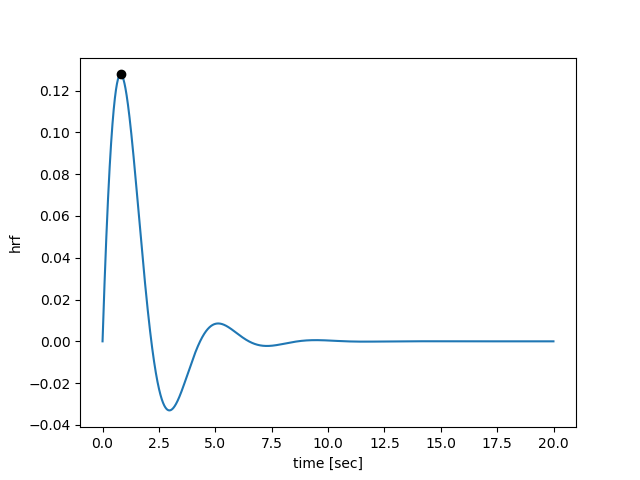

In [6]:
# plot the kernel
plt.plot(bold._stock_time, bold.hemodynamic_response_function.T[::-1]); 
plt.ylabel('hrf');
plt.xlabel('time [sec]')

# plot the maximum
plt.plot(bold._stock_time[bold.hemodynamic_response_function.T[::-1].argmax()], bold.hemodynamic_response_function.T[::-1].max(), 'ko')

In [7]:
print ('Rising peak is around %1.2f seconds' % bold._stock_time[bold.hemodynamic_response_function.T[::-1].argmax()])

Rising peak is around 0.80 seconds


Exploring other HRF kernels
---------------------------

 
First, we will create new instances of the Bold monitor.

Second, the equation defining the hrf kernel has to be changed. To achieve this we will make use of the predefined functions as Equations datatypes 

- In [2] they used a simple gamma function; in [3] a difference of damped oscillators was fitted to functional data from the visual cortex; the mixture of gammas is the function used in softwares like SPM. 

<IPython.core.display.Javascript object>


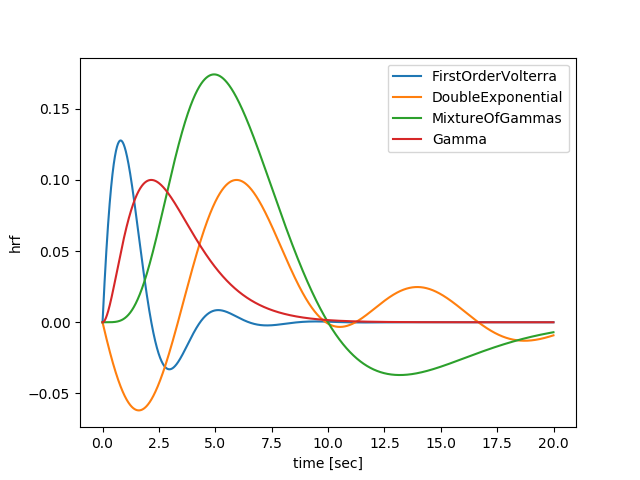

In [8]:
hrf_kernels = [equations.FirstOrderVolterra(),
               equations.DoubleExponential(),
               equations.MixtureOfGammas(),
               equations.Gamma()]

figure()
for hrf in hrf_kernels: 
    bold_monitor = monitors.Bold(hrf_kernel=hrf)
    bold_monitor.dt = 2**-4
    bold_monitor.compute_hrf()
    plot(bold_monitor._stock_time,
         bold_monitor.hemodynamic_response_function.T[::-1], 
         label=hrf.__class__.__name__);

ylabel('hrf');
xlabel('time [sec]')    
legend()

* [1] Friston, K., Mechelli, A., Turner, R., and Price, C., *Nonlinear Responses in fMRI: The Balloon Model, Volterra Kernels, and Other Hemodynamics*, NeuroImage, 12, 466 - 477, 2000. 

* [2] Geoffrey M. Boynton, Stephen A. Engel, Gary H. Glover and David J. Heeger (1996). *Linear Systems Analysis of Functional Magnetic Resonance Imaging in Human V1*. J Neurosci 16: 4207-4221

* [3] Alex Polonsky, Randolph Blake, Jochen Braun and David J. Heeger (2000). *Neuronal activity in human primary visual cortex correlates with perception during binocular rivalry*. Nature Neuroscience 3: 1153-1159

* [4] Glover, G. *Deconvolution of Impulse Response in Event-Related BOLD fMRI*. NeuroImage 9, 416-429, 1999.

* [5] Have a look at this tutorial: https://nbviewer.codemart.ro/github/practical-neuroimaging/pna-notebooks/blob/master/convolution.ipynb

* [6] Drysdale, P. M.; Huber, J. P.; Robinson, P. A. & Aquino, K. M. *Spatiotemporal BOLD dynamics from a poroelastic hemodynamic model*. J Theor Biol, 2010, 265, 524–534

* [7] http://en.wikibooks.org/wiki/SPM/Haemodynamic_Response_Function
